<a href="https://colab.research.google.com/github/Kccev802/kccev/blob/main/Lab1_khadijah_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AI342-F1/Lab-Tutoral/blob/main/AI342Lab1.ipynb)

# Lab 1: Introduction to Digital Images and Image Processing with Python
**Course:** AI342 Image Processing  
**University:** Taibah University  
**College:** Computer Science and Engineering  
**Department:** AI & DS
---
### Learning Objectives:
* Represent a digital image as a numerical array.
* Understand pixels, spatial resolution, and grey level intensity.
* Load, display, and inspect images in Python.
* Apply simple low-level image processing operations.
* Relate practical operations to the image processing pipeline introduced in Chapter 1

## 1. Environment Setup

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

## 2. What is a digital image in practice?
In the lecture, a digital image is defined as a two dimensional function $f(x,y)$ where the value at each coordinate represents intensity. In practice, this function is stored as a matrix of numbers.

##**Exercise 2.1: Create a synthetic image**


In [2]:
image = np.zeros((8, 8))
print("Image Matrix:")
print(image)

# --- Discussion Questions ---
# 1. What is the spatial resolution of this image?
# Answer: The resolution is 8x8 pixels.

# 2. What does each value represent?
# Answer: Each value represents the intensity of the pixel (0 = Black).

Image Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


##**Exercise 2.2: Visualise the image**

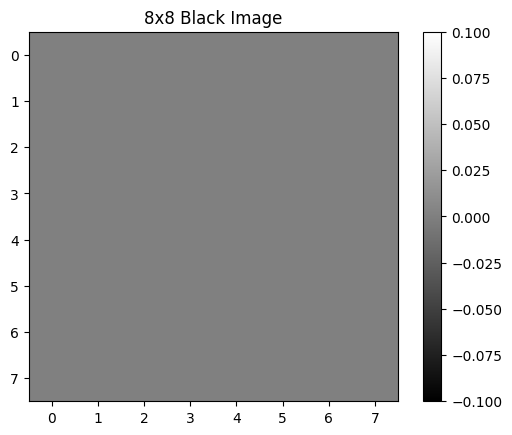

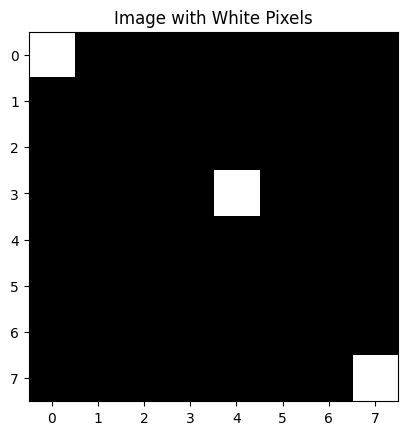

In [3]:
plt.imshow(image, cmap='gray')
plt.title("8x8 Black Image")
plt.colorbar()
plt.show()

image[0, 0] = 255 # Top-left pixel
image[7, 7] = 255 # Bottom-right pixel
image[3, 4] = 255 # Middle pixel

plt.imshow(image, cmap='gray')
plt.title("Image with White Pixels")
plt.show()

## 3. Pixels and intensity values
Pixels are the smallest units of a digital image and hold quantised intensity values, as discussed in the slides on pixels and digitisation
## **Exercise 3.1: Modify individual pixels**


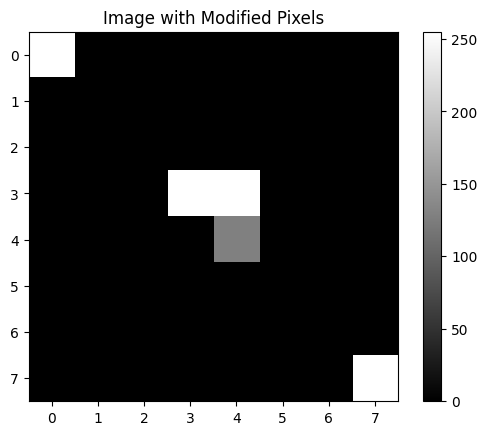

In [4]:
image[3, 3] = 255
image[4, 4] = 128

plt.imshow(image, cmap='gray')
plt.title("Image with Modified Pixels")
plt.colorbar()
plt.show()

# --- Questions ---
# 1. Which pixel is brighter and why?
# Answer: Pixel (3,3) is brighter because its value (255) is higher than (4,4) which is 128. [cite: 51]

# 2. How does quantisation affect visual appearance?
# Answer: It defines the number of gray levels we can see. [cite: 52]

## 4. Grey scale images
The course focuses primarily on grey scale images with one sample per pixel.
## **Exercise 4.1: Generate a gradient image**


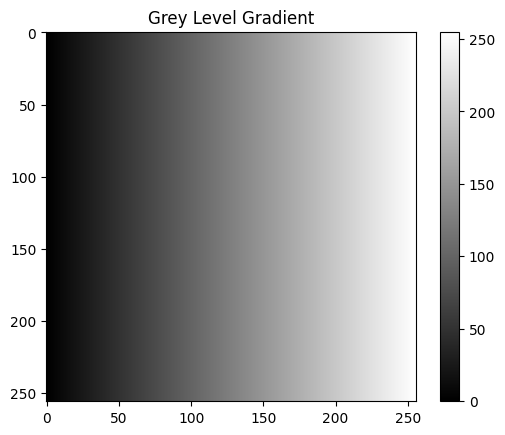

In [5]:
gradient = np.tile(np.linspace(0, 255, 256), (256, 1))

plt.imshow(gradient, cmap='gray')
plt.title("Grey Level Gradient")
plt.colorbar()
plt.show()

# --- Questions ---
# 1. How many grey levels are visible?
# Answer: 256 levels (from 0 to 255). [cite: 66]

# 2. What data type is used to store the pixel values?
# Answer: float64 (created by linspace). [cite: 69]

## 5. Image acquisition and representation
Image acquisition converts a physical scene into a digital image. In Python, loading an image is equivalent to acquiring an already digitised scene.
## **Exercise 5.1: Load and inspect an image**

Image shape: (1024, 1024, 3)
Data type: uint8


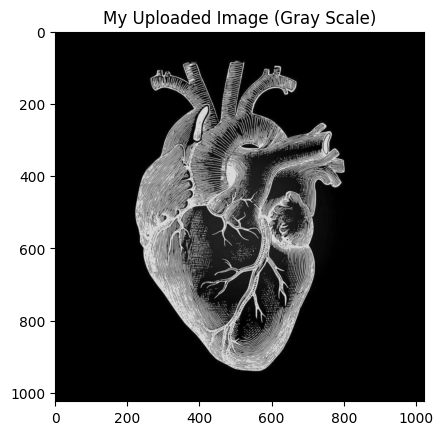

In [6]:
image_path = '/content/قلب.jpg'
image = imread(image_path)

print("Image shape:", image.shape)
print("Data type:", image.dtype)

if len(image.shape) == 3:
    gray = image.mean(axis=2)
else:
    gray = image

plt.imshow(gray, cmap='gray')
plt.title("My Uploaded Image (Gray Scale)")
plt.show()

## 6. Low level image processing: image in, image out
Low level processing improves visual quality without extracting semantic meaning, as described in the lecture pipeline
## **Exercise 6.1: Image enhancement by contrast stretching**

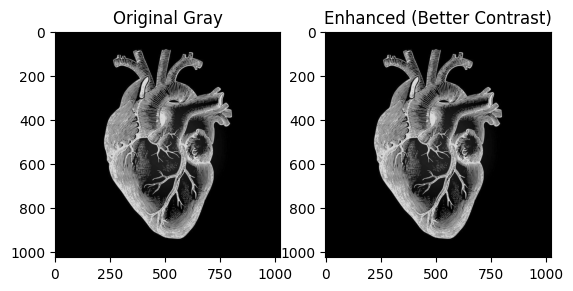

In [7]:
# Contrast Stretching
min_val = gray.min()
max_val = gray.max()

enhanced = (gray - min_val) / (max_val - min_val) * 255

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Gray")

plt.subplot(1,2,2)
plt.imshow(enhanced, cmap='gray')
plt.title("Enhanced (Better Contrast)")
plt.show()


## 7. Noise and image restoration
Noise removal is a core example of low level processing.

## **Exercise 7.1: Add artificial noise**

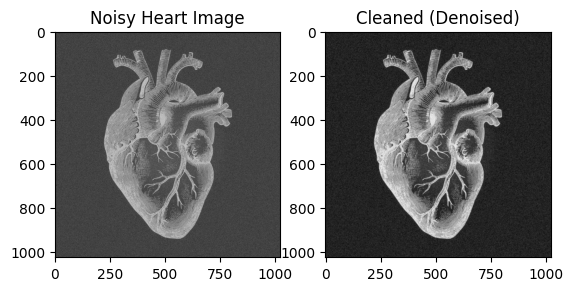

In [8]:

noise = np.random.normal(0, 15, gray.shape)
noisy_image = gray + noise

def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised_image = mean_filter(noisy_image, k=3)

plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Heart Image")

plt.subplot(1,2,2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Cleaned (Denoised)")
plt.show()


## **Exercise 7.2: Simple smoothing filter**

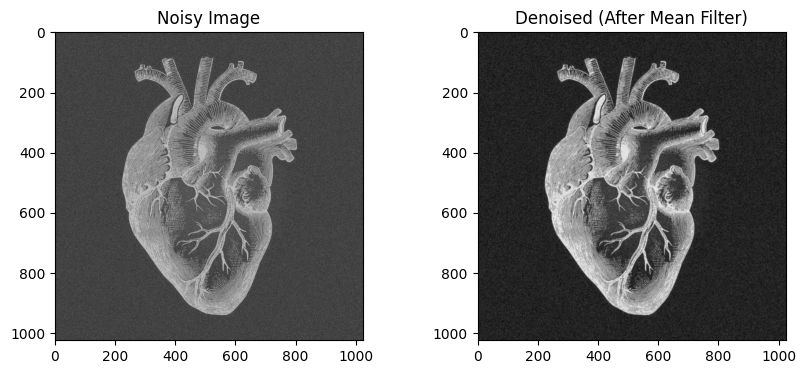

In [10]:
def mean_filter(img, k=3):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output
denoised = mean_filter(noisy_image)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")

plt.subplot(1,2,2)
plt.imshow(denoised, cmap='gray')
plt.title("Denoised (After Mean Filter)")
plt.show()

## 8. From image processing to image analysis
The lecture distinguishes between low, mid, and high level processing.
## **Exercise 8.1: Simple threshold segmentation**

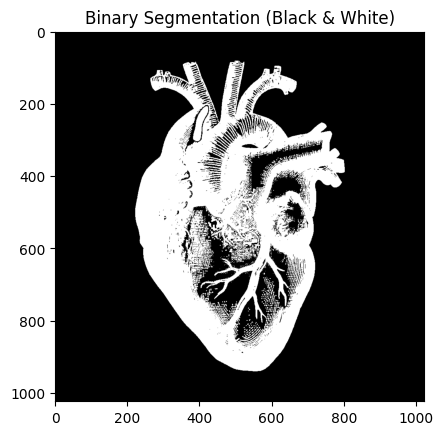

In [11]:
threshold_value = gray.mean()
binary_image = gray > threshold_value

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Segmentation (Black & White)")
plt.show()

# Discussion:
# 1. Is this segmentation reliable?
#Not always. It depends on the lighting of the image.  If the background and the object have similar brightness, or if there is uneven lighting (shadows), the mean threshold will not be able to separate them correctly
# 2. What information is lost when converting to binary?
#We lose all the gray-level intensities and fine details (textures) of the image. The image is reduced to only two values (0 and 1), so we only keep the general shapes and lose the depth and internal details of the objects

#**9. Mini project: connecting theory to practice**

**Task**

Using only NumPy and Matplotlib:

1.	Create a synthetic image containing at least two objects

2.	Add noise to the image

3.	Apply enhancement and denoising

4.	Segment the objects using a threshold

**Deliverables**

•	Code

•	Output images

•	Short explanation mapping each step to the image processing stages shown in the Chapter 1 pipeline diagram


***Note: Organize your project into logical steps using separate cells, include a Text Cell before each stage to explain your approach, and ensure all results are clearly visualized using titles and subplots***

# Step 1: Create a synthetic image

We create a 100x100 black image and add two white objects: a square and a circle. This represents the "Image Acquisition" stage where we define the scene.

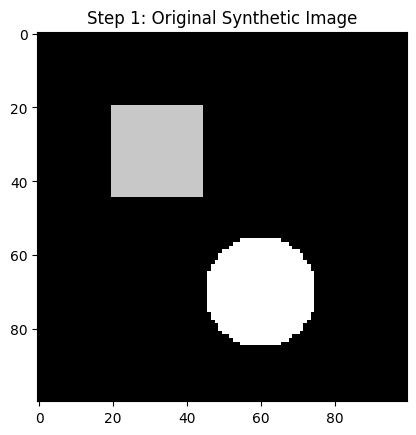

In [12]:
project_img = np.zeros((100, 100))

project_img[20:45, 20:45] = 200

for i in range(100):
    for j in range(100):
        if (i-70)**2 + (j-60)**2 < 15**2:
            project_img[i, j] = 255

plt.imshow(project_img, cmap='gray')
plt.title("Step 1: Original Synthetic Image")
plt.show()

# Step 2: Add Noise (Image Degradation)

We add random noise to simulate real-world conditions where images often get corrupted during capture or transmission.

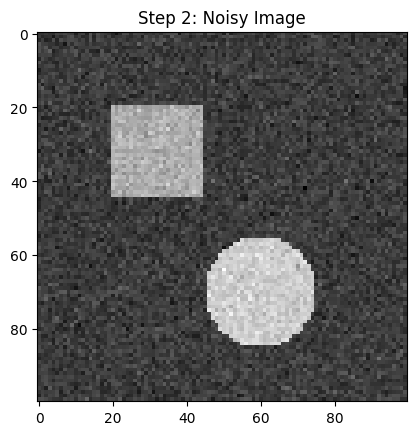

In [13]:
noise = np.random.normal(0, 25, project_img.shape)
noisy_project = project_img + noise

plt.imshow(noisy_project, cmap='gray')
plt.title("Step 2: Noisy Image")
plt.show()

# Step 3: Enhancement and Denoising (Low-Level Processing)

We apply a Mean Filter to reduce noise and "Contrast Stretching" to make the objects clearer. This is "Low-Level Processing" because the input and output are both images.

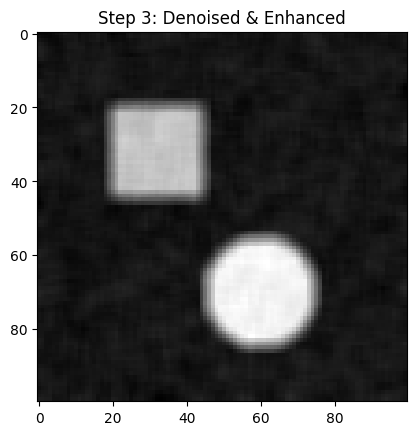

In [14]:

def mean_filter(img, k=5):
    pad = k // 2
    padded = np.pad(img, pad, mode='edge')
    output = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i, j] = padded[i:i+k, j:j+k].mean()
    return output

denoised_project = mean_filter(noisy_project, k=5)

plt.imshow(denoised_project, cmap='gray')
plt.title("Step 3: Denoised & Enhanced")
plt.show()

# Step 4: Segmentation (Mid-Level Processing / Analysis)

we use a threshold to separate the objects from the background. This is "Mid-Level Processing" as we start to extract attributes (the shapes).

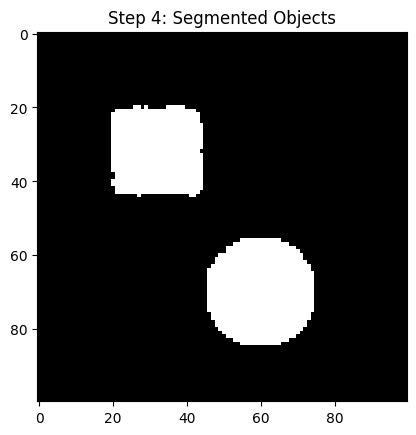

In [15]:
threshold = 120
segmented_project = denoised_project > threshold

plt.imshow(segmented_project, cmap='gray')
plt.title("Step 4: Segmented Objects")
plt.show()

# Mapping to Chapter 1 Pipeline (Short Explanation)

**Step 1: Image Creation (Image Acquisition)**

This corresponds to the Image Acquisition stage. We are defining the digital representation of a scene as a numerical matrix $f(x,y)$.

**Step 2 & 3: Noise & Denoising (Low-Level Processing)**

These steps fall under Low-Level Processing. The goal is to improve visual quality (Image In, Image Out) through enhancement and restoration without extracting meaning

**Step 4: Thresholding (Mid-Level Processing)**

This is the beginning of Image Analysis or Mid-Level Processing. We move from "image in, image out" to "image in, attributes out" by segmenting the objects (Circle and Square) from the background

# Reflection Questions

1. **Where does image processing end and image analysis begin in your mini project?**

Image processing ends at Step 3 (Denoising), where the output is still a modified version of the image. Image analysis begins at Step 4 (Segmentation), where we start to extract specific objects (attributes) from the scene to understand its content.

**2. Which steps correspond to low level processing only?**

Step 2 (Adding noise) and Step 3 (Denoising/Enhancement) are low-level processing. These steps involve "image in, image out" operations where the goal is simply to improve or change the visual quality without identifying object

**3. Why is digitisation always an approximation of reality**

Because reality is continuous in both space and intensity ($f(x,y)$). Digitization involves sampling (limiting spatial resolution) and quantization (limiting gray levels), which means we lose the infinite details of the real world and store them as a finite grid of number